In [ ]:
### Ce notebook reprend le notebook essai_juliette (pour éviter les conflits)

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)

In [42]:
import pandas as pd
import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

# On renomme la colonne insee dès maintenant (pour harmoniser ensuite)
industries_polluantes = industries_polluantes.rename(columns={"code_insee" : "insee"})
industries_polluantes.head()


,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,region,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr
0,6101975,COFIBEX,43425026200012,AVENUE DE LA LIBERATION ZONE INDUSTRIELLE,1500,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.33551,45.96163,4326.0,6420Z,Activités des sociétés holding,NaN,NaN
1,9000321,AIA Ambrieu en Bugey,15000028900135,avenue du colonel CHAMBONNET Base arienne 278,1508,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34592,45.97117,4326.0,8422Z,Défense,NaN,NaN
2,6100021,THIERRY DANNENMULLER TRANSPORTS LOCATIONS TRAV...,35234119200065,LE PELOUX CARRIERE D'AMBRONAY LE PELOUX,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34282,46.02817,4326.0,0811Z,Extraction de pierres ornementales et de const...,NaN,NaN
3,3202489,SOCIETE BRESSANE DE STOCKAGE ET DE CHARGEMENT,34408383700015,GARE,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.35873,46.00535,4326.0,5224B,Manutention non portuaire,NaN,NaN
4,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...


In [44]:
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets = rejets.rename(columns = {"code_insee" : "insee"})

rejets.head()

,identifiant,nom_etablissement,code_postal,insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [22]:
industries_polluantes.columns

Index(['identifiant', 'nom_etablissement', 'numero_siret', 'adresse',
       'code_postal', 'code_insee', 'commune', 'code_departement',
       'departement', 'code_region', 'region', 'coordonnees_x',
       'coordonnees_y', 'code_epsg', 'code_ape', 'libelle_ape', 'code_eprtr',
       'libelle_eprtr'],
      dtype='object')

In [45]:
# on merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on=["identifiant", "nom_etablissement", "code_postal", "insee",
"commune", "code_departement", "departement", "code_region", "region"], how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,...,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 ROUTE DE SAINT MAURICE DE GOURDANS SITE IN...,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2014Z,Fabrication d'autres produits chimiques organi...,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 ROUTE DE ST MAURICE DE GOURDANS,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2016Z,Fabrication de matières plastiques de base,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,570 RUE DE L'ANGE ZI SUD PLASTICS VALLEE BP5,1100,01031,BELLIGNAT,01,AIN,84.0,...,5.62876,46.24919,4326.0,2012Z,Fabrication de colorants et de pigments,NaN,NaN,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,5 CHEMIN DE TAPEY ZI D ARLOD,1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,5.81411,46.08494,4326.0,3821Z,Traitement et élimination des déchets non dang...,5.(b),Installations destinées à l'incinération des d...,2023,NaN,25903484.0


In [26]:
#### Et on importe le fichier avec les shapefiles des communes

import requests

# Téléchargement du fichier avec les shapefiles des communes, directement depuis Datagouv
url_communes = "https://www.data.gouv.fr/api/1/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165"
zip_communes = "shapefiles.zip"

# Enregistrement du fichier localement
response_communes = requests.get(url_communes)
with open(zip_communes, "wb") as f:
    f.write(response_communes.content)

# Importation avec GeoPandas
communes = gpd.read_file(f"zip://{zip_communes}!communes-20220101.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.3851, 9..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.2001 42.39013, 9.20014 42.39014, 9..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.2512 42.37605, 9.25132 42.37603, 9..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.2834 42.66273, 9.28345 42.66273, 9..."


In [46]:
print(communes.shape, etablissements_rejets.shape)
print(communes.columns, etablissements_rejets.columns)

(34955, 5) (3922, 21)
Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry'], dtype='object') Index(['identifiant', 'nom_etablissement', 'numero_siret', 'adresse',
       'code_postal', 'insee', 'commune', 'code_departement', 'departement',
       'code_region', 'region', 'coordonnees_x', 'coordonnees_y', 'code_epsg',
       'code_ape', 'libelle_ape', 'code_eprtr', 'libelle_eprtr', 'annee_rejet',
       'rejet_raccorde_m3_par_an', 'rejet_isole_m3_par_an'],
      dtype='object')


In [ ]:
### Préparation du dataframe de travail

# On renomme la colonne avec le code INSEE dans le df des communes (shapefiles) pour le joindre à celui tiré de Géorisques

# On fait la jointure
df = pd.merge(communes, etablissements_rejets, on="insee", how = "inner")

In [36]:
# Conversion du fichier au format GeoPandas
df = gpd.GeoDataFrame(df, geometry='geometry')

In [ ]:
# import matplotlib.pyplot as plt


# df = df.to_crs(epsg=4326)

# # On filtre les communes présentes dans la table des industries polluantes
# communes_polluantes = df[df["code_insee"].isin(industries_polluantes["code_insee"])]

# # Carte
# ax = communes_polluantes.plot(
#     color="red",        # couleur de remplissage
#     edgecolor="black",  # bordure noire
#     linewidth=0.3,
#     figsize=(10, 10),
#     alpha=0.8
# )

# plt.title("Communes avec industries polluantes", fontsize=13)
# plt.axis("off")
# plt.show()



In [47]:
# on filtre le GeoDataFrame pour ne garder que les communes d'Ile de France (code_region = 11.0)
gdf_idf = df[df["code_region"] == 11.0].copy()

# puis on filtre celles avec industries polluantes
communes_polluantes_idf = gdf_idf.copy()
communes_polluantes_idf = communes_polluantes_idf[communes_polluantes_idf["insee"].isin(industries_polluantes["insee"])]

In [59]:
communes.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry'], dtype='object')

In [63]:
communes_idf = communes.copy()
communes_idf["Departement"] = communes_idf["insee"].str.slice(0, 2)
communes_idf = communes_idf[communes_idf["Departement"].isin(["75", "77", "78", "91", "92", "93", "94", "95"])]

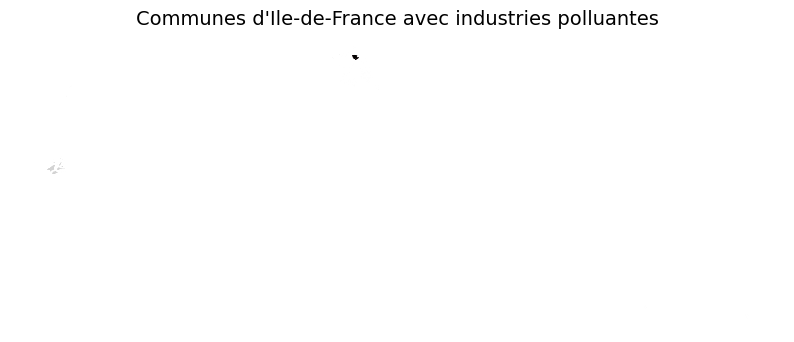

In [64]:
import matplotlib.pyplot as plt

communes_idf = communes_idf.to_crs(epsg=2154)
communes_polluantes_idf = communes_polluantes_idf.to_crs(epsg=2154)

fig, ax = plt.subplots(figsize=(10, 10))

gdf_idf.plot(ax=ax, color='lightgrey', edgecolor='white')

communes_polluantes_idf.plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)

ax.set_title("Communes d'Ile-de-France avec industries polluantes", fontsize=14)
ax.axis('off')

plt.show()
